<a href="https://colab.research.google.com/github/apaar733/OpenCV_CarDetection/blob/main/OpenCV_CarDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import sys
print(sys.executable)

/usr/bin/python3


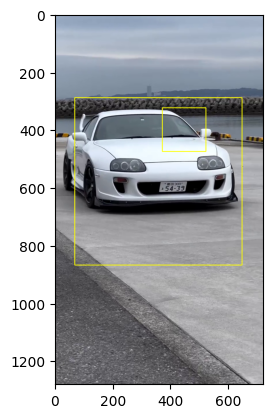

In [8]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Create our body classifier
car_classifier = cv2.CascadeClassifier('cars.xml')

# Check if the classifier loaded correctly
if car_classifier.empty():
    print("Error loading cascade classifier. Check the file path: cars.xml")
else:
    print("Cascade classifier loaded successfully.")


# Initiate video capture for video file
cap = cv2.VideoCapture('cars.avi')

# Check if video opened successfully
if not cap.isOpened():
    print("Error opening video file. Check the file path:cars.avi")
else:
    print("Video file opened successfully.")


# Create a figure and axes for displaying the frame
fig, ax = plt.subplots(1)
img_plot = None

# Loop once video is successfully loaded and classifier is loaded
if cap.isOpened() and not car_classifier.empty():
    while True:

        time.sleep(.05)
        # Read first frame
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Pass frame to our car classifier
        # Adjust parameters if necessary
        cars = car_classifier.detectMultiScale(gray, 1.4, 2)

        # Draw bounding boxes for any bodies identified
        for (x,y,w,h) in cars:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)

        # Convert BGR to RGB for matplotlib
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Display the frame using matplotlib
        if img_plot is None:
            img_plot = ax.imshow(frame_rgb)
        else:
            img_plot.set_data(frame_rgb)

        clear_output(wait=True)
        display(fig)

        # Use a different condition to break the loop, as waitKey is for GUI
        # For example, you can add a condition to break after a certain number of frames
        # or based on user input if running in a local environment with a GUI
        # In Colab, you might let it run through the whole video or add a manual interrupt

    cap.release()
    plt.close(fig) # Close the figure after the video is processed